# MODELO PREDICTIVO DE REGRESIÓN LOGISTICA - TITANIC - FASE 5

Presentado por Duverney Torres Figueroa - Grupo 42

Puntos a abordar

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entren el 3 modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el m delo.
5. Entrenar el modelo configurando los diferentes hiperpar metros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-s ore, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos..

# Primer Punto

Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

Importar bibliotecas y cargar los datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
Datos = pd.read_csv('./Titanic-Dataset.csv')

# Mostrar las primeras 50 filas del dataset para verificar que se ha cargado correctamente
Datos.head(50)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Resumen del dataset

In [4]:
# Información general del dataset
Datos.info()

# Descripción estadística del dataset
Datos.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Análisis de valores faltantes

In [5]:
# Verificar valores faltantes
Datos.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Distribución de las variables

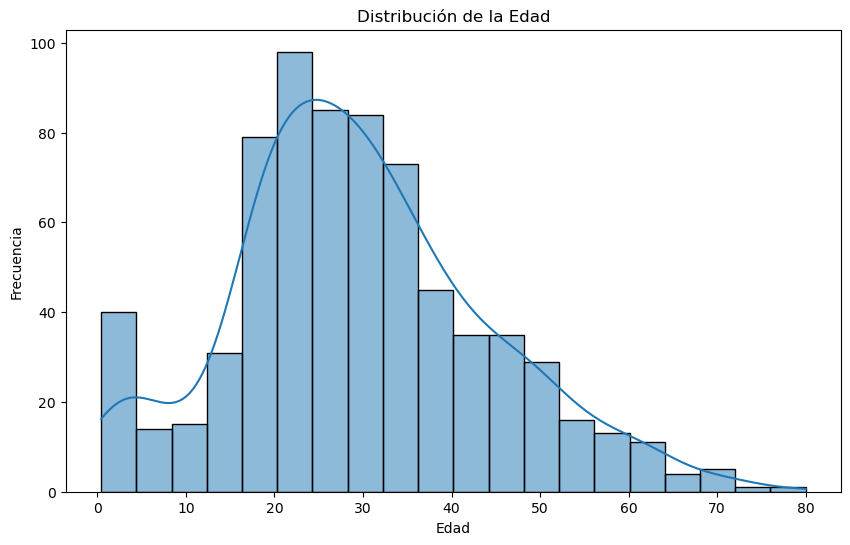

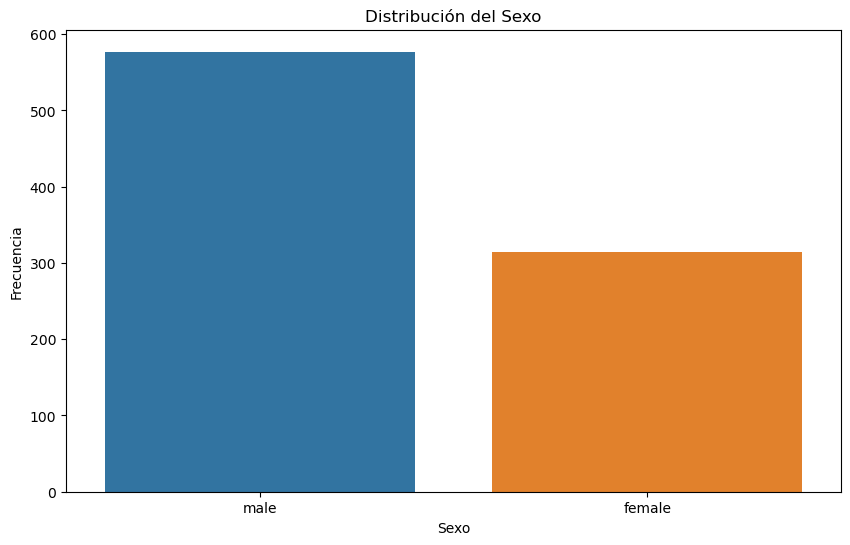

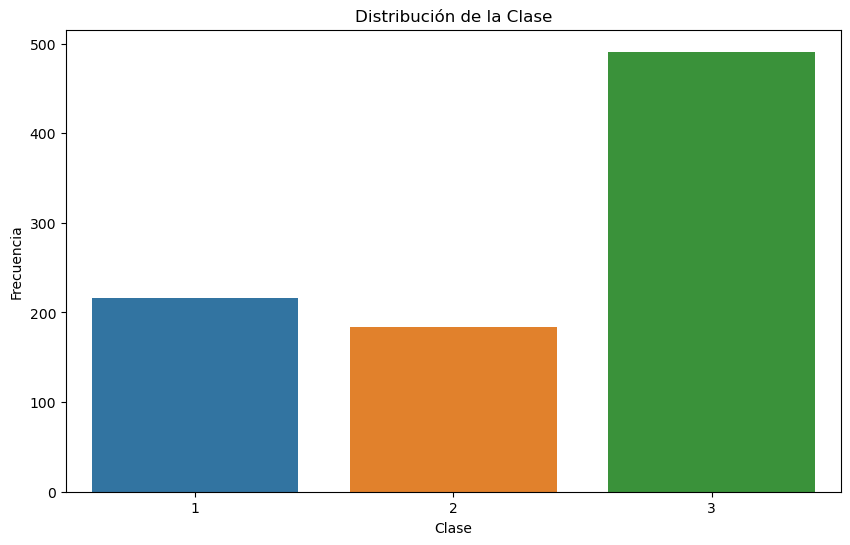

In [7]:
# Distribución de la edad
plt.figure(figsize=(10, 6))
sns.histplot(Datos['Age'].dropna(), kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Distribución del sexo
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', data=Datos)
plt.title('Distribución del Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de la clase
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=Datos)
plt.title('Distribución de la Clase')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()


# Segundo Punto

Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

Manejo de valores faltantes

In [9]:
# Imputar valores faltantes en la columna 'Age' con la media
Datos['Age'].fillna(Datos['Age'].mean(), inplace=True)

# Imputar valores faltantes en la columna 'Embarked' con la moda
Datos['Embarked'].fillna(Datos['Embarked'].mode()[0], inplace=True)

# Eliminar la columna 'Cabin' debido a la gran cantidad de valores faltantes
Datos.drop(columns=['Cabin'], inplace=True)

# Verificar nuevamente valores faltantes
Datos.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Codificación de variables categóricas

In [10]:
# Codificación de variables categóricas
Datos = pd.get_dummies(Datos, columns=['Sex', 'Embarked'], drop_first=True)

# Verificar el dataset después de la codificación
Datos.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,True


# Tercer punto

Seleccionar las características más relevantes para entren el 3 modelo utilizando selección de características.

In [12]:
# Selección de características
X = Datos[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = Datos['Survived']


# Cuarto punto

Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [13]:
from sklearn.model_selection import train_test_split

# División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos de datos
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 8), (179, 8), (712,), (179,))

# Quinto punto

Entrenar el modelo configurando los diferentes hiperparametros.

In [14]:
from sklearn.linear_model import LogisticRegression

# Crear el modelo de regresión logística
modelo = LogisticRegression(max_iter=200)

# Entrenar el modelo
modelo.fit(X_train, y_train)


LogisticRegression(max_iter=200)

# Sexto Punto

Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-s ore, etc.

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluar el modelo
print("Precisión:", accuracy_score(y_test, y_pred))
print("Precisión (precision):", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

# Matriz de confusión
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))


Precisión: 0.8100558659217877
Precisión (precision): 0.7857142857142857
Recall: 0.7432432432432432
F1-score: 0.7638888888888888

Matriz de confusión:
[[90 15]
 [19 55]]

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



# Séptimo punto

Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

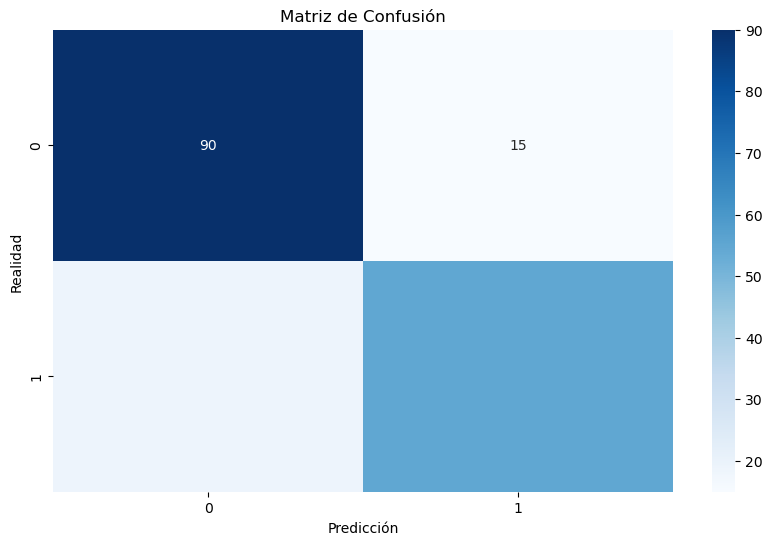

In [16]:
# Matriz de confusión
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


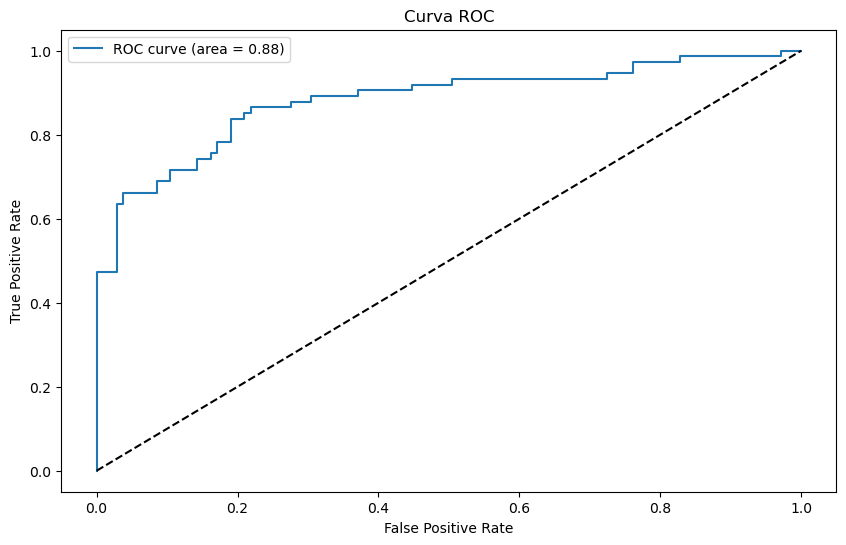

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predecir las probabilidades
y_pred_proba = modelo.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()


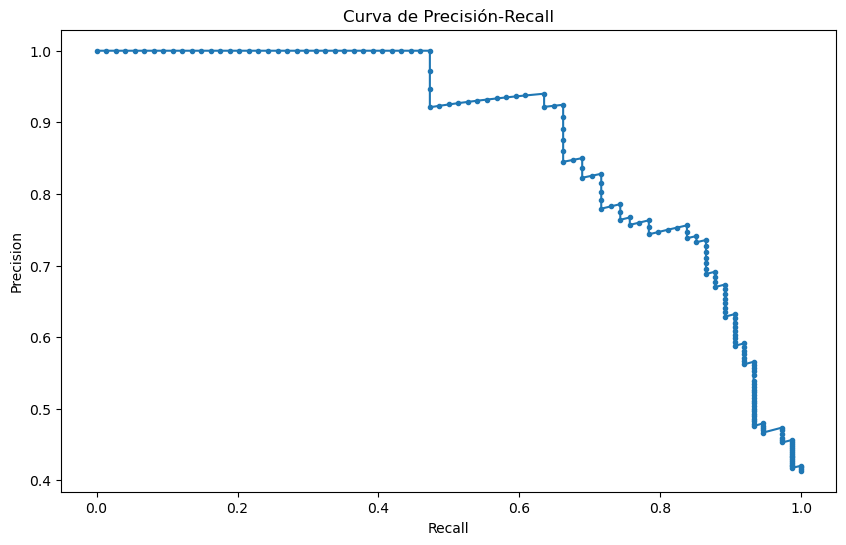

In [18]:
from sklearn.metrics import precision_recall_curve

# Calcular la curva de precisión-recall
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Graficar la curva de precisión-recall
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall')
plt.show()


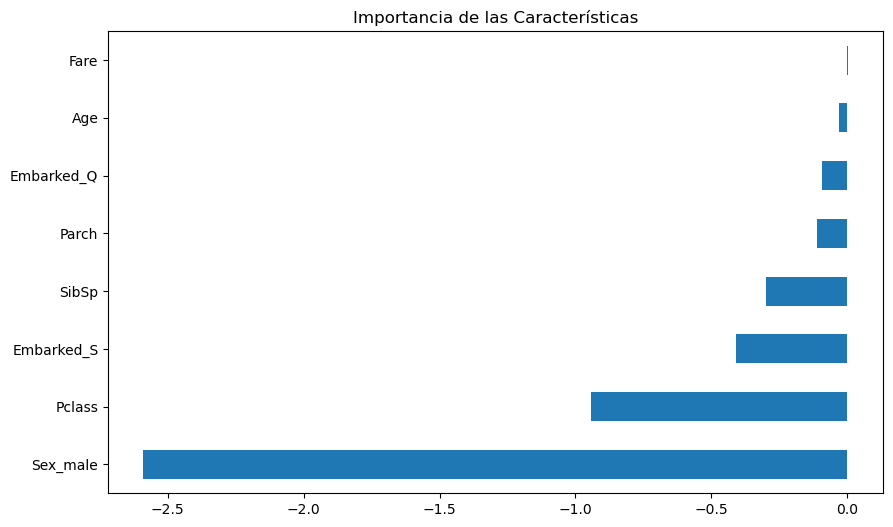

In [19]:
# Extraer los coeficientes del modelo
importancia_caracteristicas = pd.Series(modelo.coef_[0], index=X.columns)

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
importancia_caracteristicas.sort_values().plot(kind='barh')
plt.title('Importancia de las Características')
plt.show()


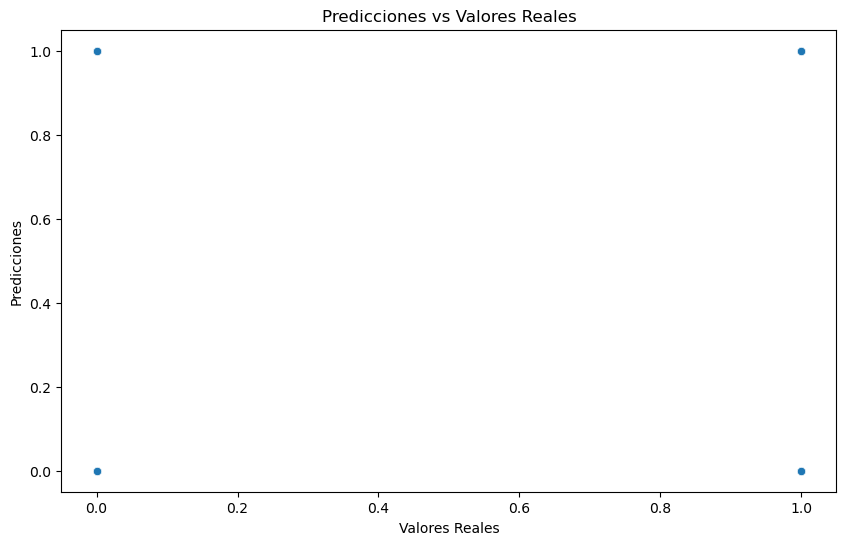

In [20]:
# Crear un dataframe con las predicciones y los valores reales
resultados = pd.DataFrame({'Real': y_test, 'Predicción': y_pred})

# Graficar las predicciones versus los valores reales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Real', y='Predicción', data=resultados)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()


# Octavo punto

Interpretar, analizar y documentar los resultados obtenidos..

Análisis:

- La precisión global de 0.81 indica que el modelo clasifica correctamente el 81% de las instancias.
- La precisión para los pasajeros que no sobrevivieron (clase 0) es ligeramente superior a la de los que sí sobrevivieron (clase 1), lo cual puede indicar que el modelo es mejor para identificar correctamente a los pasajeros que no sobrevivieron.
- El recall para la clase 0 es también mayor que para la clase 1, lo cual sugiere que el modelo es más eficiente en detectar a los pasajeros que no sobrevivieron.
- El F1-score es más alto para la clase 0 que para la clase 1, lo que confirma que el modelo tiene un mejor equilibrio entre precisión y recall para la clase 0.


Curva ROC:

Área bajo la curva (AUC): 0.88

La curva ROC y el AUC de 0.88 indican que el modelo tiene una buena capacidad discriminativa para distinguir entre las clases (sobrevivió y no sobrevivió). Un AUC cercano a 1 indica un modelo excelente, y un AUC de 0.88 es considerado muy bueno.

Curva de Precisión-Recall
   
La curva de precisión-recall muestra una precisión alta en valores de recall bajos, lo que es típico en modelos con clases desbalanceadas. A medida que el recall aumenta, la precisión disminuye, lo que sugiere que el modelo tiene dificultades para mantener una alta precisión mientras aumenta la capacidad de identificar a todos los supervivientes (clase 1).

Documentación de Resultados

El análisis de los resultados muestra que el modelo de regresión logística utilizado para predecir la supervivencia de los pasajeros del Titanic tiene un rendimiento global bueno, con una precisión del 81%. La matriz de confusión nos da a conocer que el modelo es mejor para predecir a los pasajeros que no sobrevivieron en comparación con aquellos que sí lo hicieron.

La curva ROC con un AUC de 0.88 indica que el modelo tiene una buena capacidad para distinguir entre los pasajeros que sobrevivieron y los que no, lo que da a entender que el modelo es fiable en términos de clasificación.

La curva de precisión-recall muestra que el modelo tiene una alta precisión cuando el recall es bajo, pero esta precisión disminuye a medida que el recall aumenta. Esto es indicativo de un problema común en modelos con clases desbalanceadas, donde la identificación completa de una clase lleva a una disminución en la precisión debido a un aumento en los falsos positivos.

El modelo de regresión logística desarrollado demuestra ser una herramienta efectiva para predecir la supervivencia de los pasajeros del Titanic. Sin embargo, se puede mejorar aún más, especialmente en la identificación de los supervivientes. Ajustes adicionales en el preprocesamiento de datos, selección de características y ajuste de hiperparámetros podrían mejorar aún más el rendimiento del modelo. Considerar el uso de técnicas de balanceo de clases y probar otros modelos de aprendizaje supervisado también podrían ser estrategias útiles para mejorar la precisión y el recall para los supervivientes.